## To determine the Type of wine with Decison Tree and Random Forest : 

In [4]:
# Importing the important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
wine = pd.read_csv("E:\DSP 32 lectures- Imarticus\DSP Thane\Python\wine_dataset.csv")

In [8]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [9]:
wine.shape

(6497, 13)

In [9]:
wine['style'].value_counts() # To check the categories of each class of wine in "style" col.

white    4898
red      1599
Name: style, dtype: int64

In [8]:
wine.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [10]:
# changing the cat. data of "style" col. into numerical data


wine['style'].replace({"red": 1 , "white": 0}, inplace = True)

In [11]:
# to check for correlation :

wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
fixed_acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile_acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric_acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual_sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free_sulfur_dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total_sulfur_dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


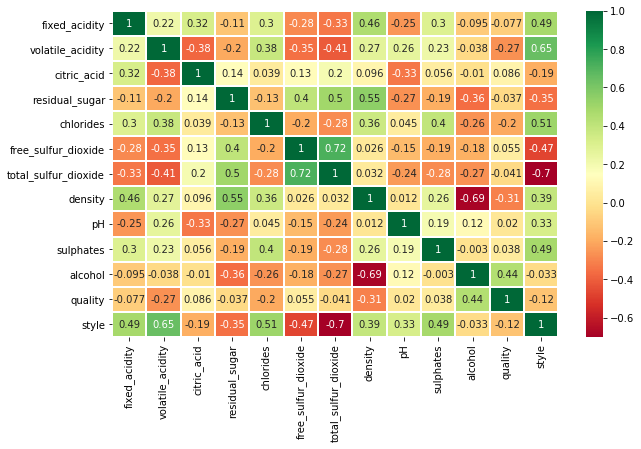

In [12]:
# To plot the correlation values :

plt.figure(figsize=(10,6))
sb.heatmap(data=wine.corr(), annot = True , linewidth = True , cmap = "RdYlGn");

In [13]:
# Choosing the variables according to the corelation values : 

x = wine.iloc[:,0:9]
y = wine.iloc[:,-1]

In [14]:
# Sampling :

from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test= train_test_split(x , y, test_size = 0.2 , random_state= 0)

In [15]:
print(x_train.shape)
print(y_train.shape)
print("----------")
print(x_test.shape)
print(y_test.shape)

(5197, 9)
(5197,)
----------
(1300, 9)
(1300,)


In [16]:
# Model Building :

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [17]:
# Training the model :
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
# predict the values :

pred_value= dt.predict(x_test)
pred_value

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [19]:
# Model evaluation :

from sklearn.metrics import confusion_matrix , accuracy_score

In [20]:
tab1 = confusion_matrix(y_test, pred_value)
tab1

array([[975,  14],
       [  7, 304]], dtype=int64)

In [32]:
acc_test = accuracy_score(y_test , pred_value) 
acc_test

0.9838461538461538

In [22]:
# to predict for train values :

pred_value_train= dt.predict(x_train)
pred_value_train


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [23]:
tab_train = confusion_matrix(y_train, pred_value_train)
tab_train

array([[3909,    0],
       [   0, 1288]], dtype=int64)

In [24]:
acc_train = accuracy_score(y_train, pred_value_train)
acc_train

1.0

In [25]:
# To visulaize the decision tree :

# To isntall the grpahviz libarary to plot the decision tree 

!pip install graphviz

In [26]:
!pip install pydotplus

In [27]:
# For adding the path to the envt.

import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

In [28]:
# Importing some libararies :

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [33]:
# Building and plotting the tree :

dot_data = StringIO() 

export_graphviz(dt, out_file= dot_data , feature_names= x_train.columns, filled = True, 
                rounded = True , special_characters=True ,class_names = ['0', '1'])

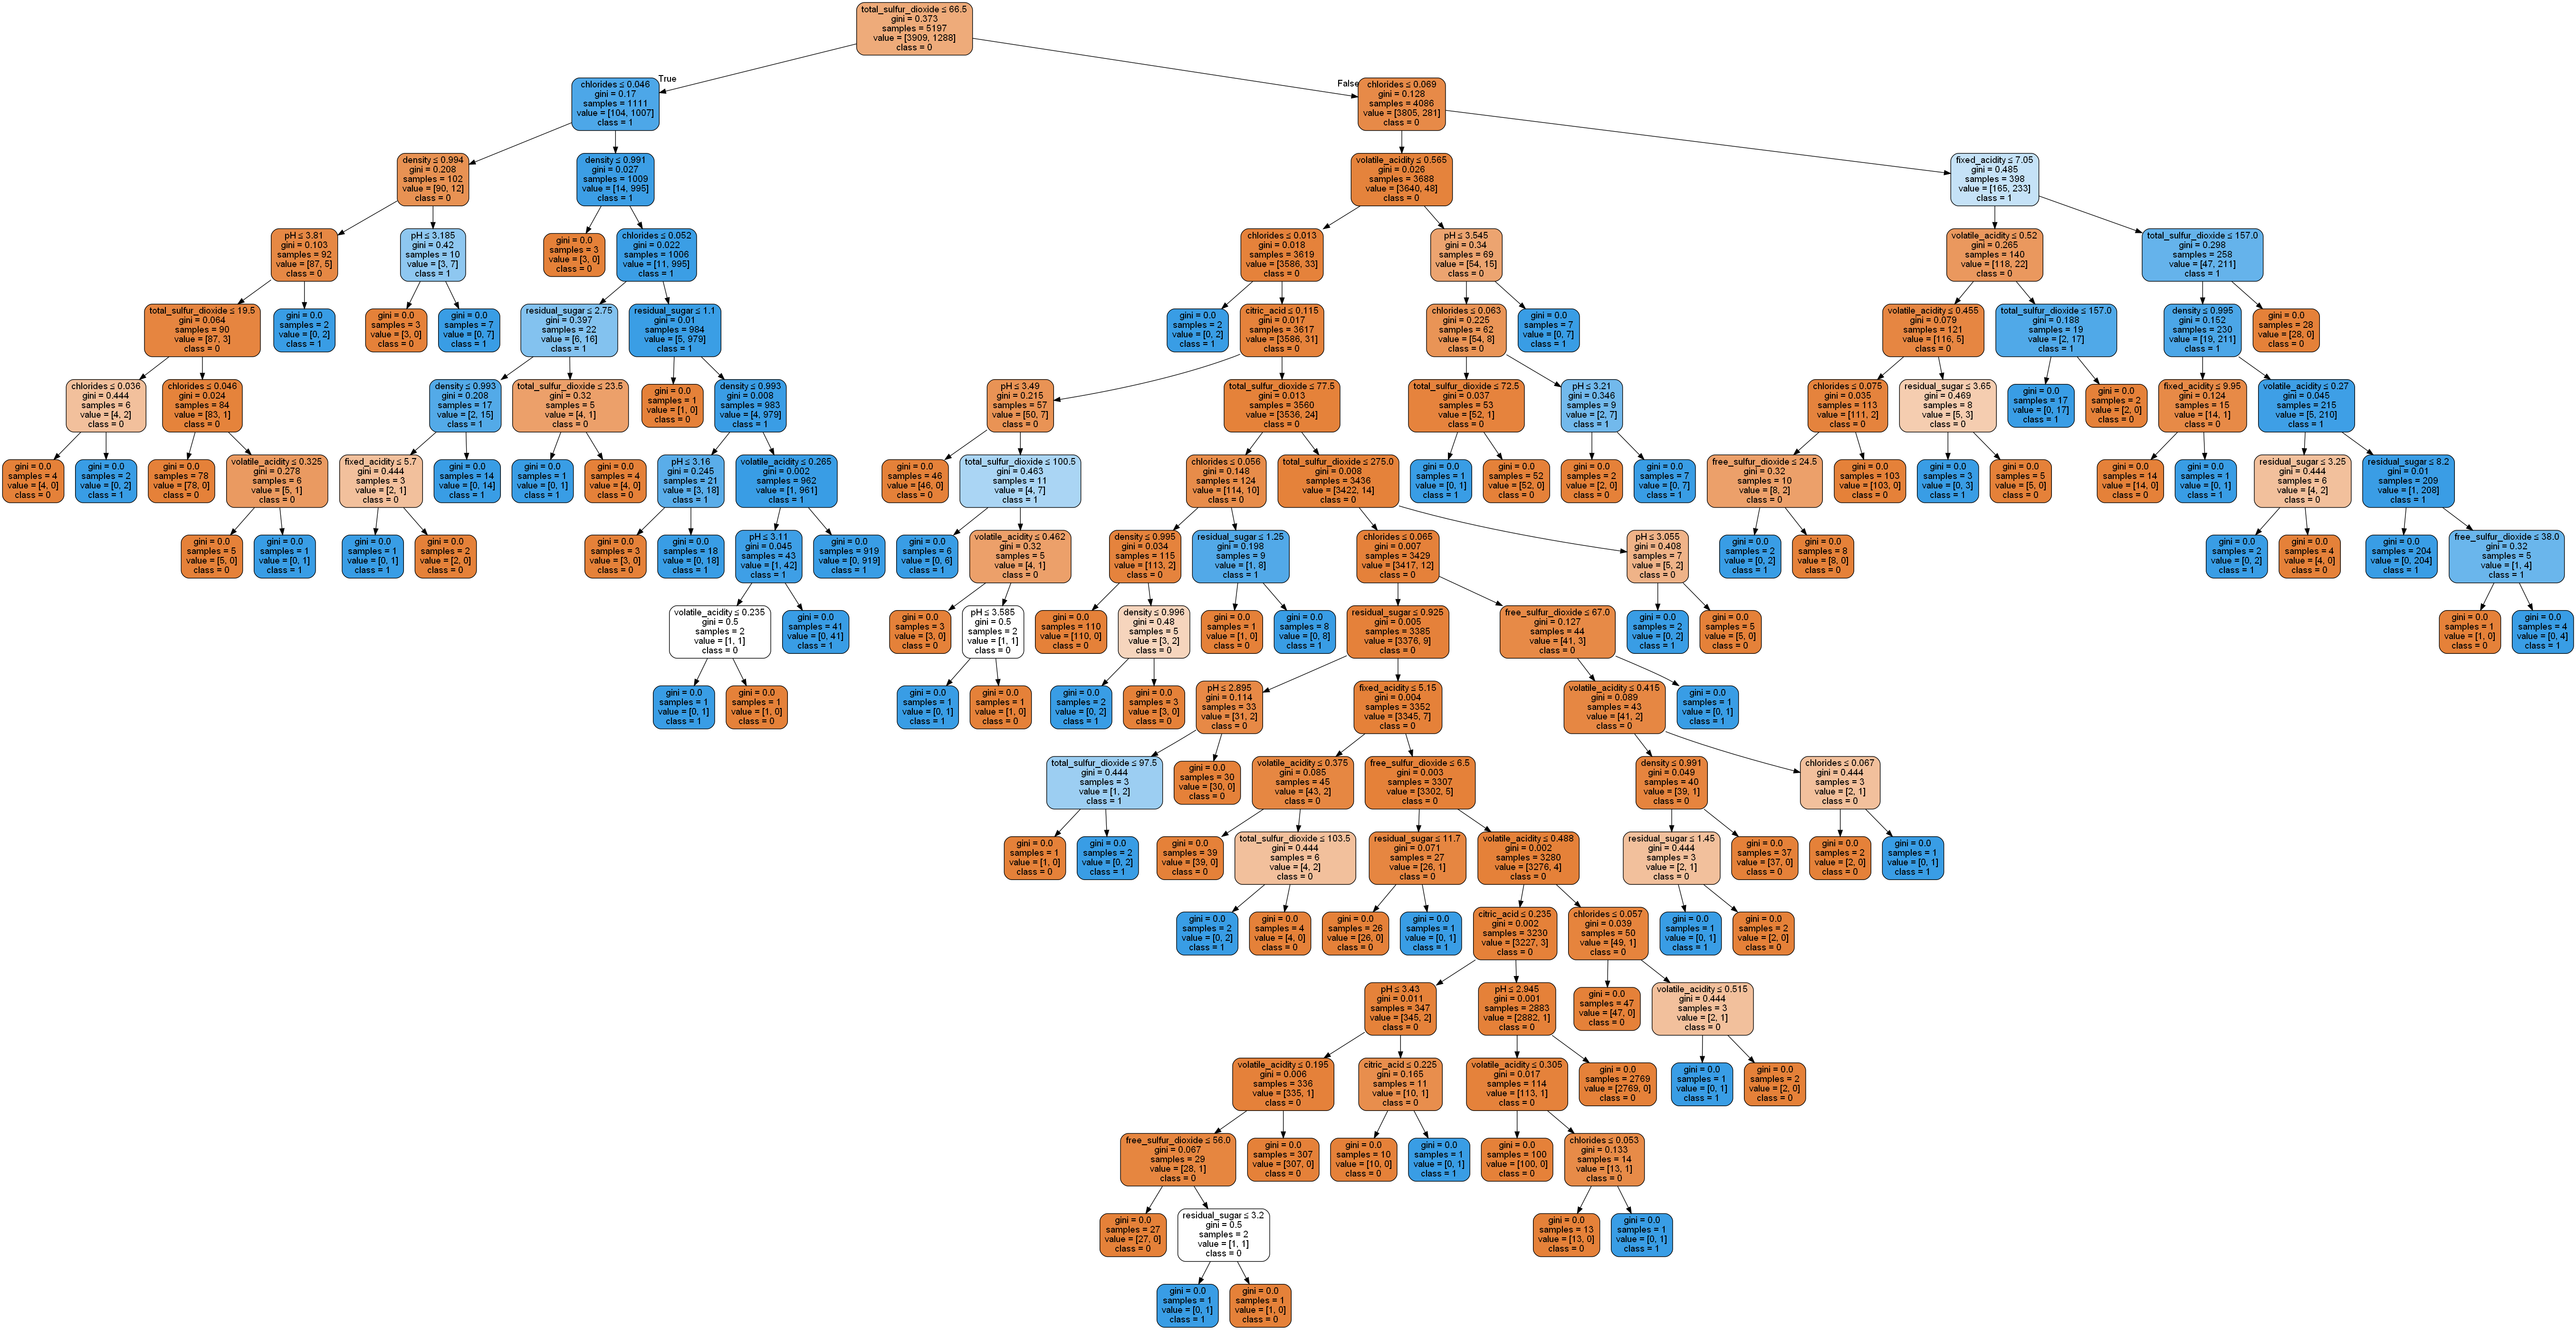

In [39]:
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# With the above code we are trying to get the values from "dot_data" file into the graph and plot it.


graph.write_png('Wine.png')    # To store the ouput as image view.
Image(graph.create_png())

In [35]:
# to determine the correct value for max_depth and max_leaf_nodes :

max_depth = []
acc_test = []
acc_train = []
max_leaf_nodes = []  # the min. value for max. leaf node should be greater than 1

# creating variables or empty list for storing the respective parameters.

for i in range(2,40):
    dtree = DecisionTreeClassifier(criterion='gini' , max_leaf_nodes=i , max_depth=i)
    dtree.fit(x_train,y_train)
    pred_test = dtree.predict(x_test)
    pred_train = dtree.predict(x_train)
    acc_test.append(accuracy_score(y_test,pred_value))
    acc_train.append(accuracy_score(y_train,pred_value_train))
    max_depth.append(i)
    max_leaf_nodes.append(i)

In [36]:
# to store the different max_depth values along with train and test accuracies :

max_depth = pd.DataFrame({"acc_train": pd.Series(acc_train), "acc_test": pd.Series(acc_test), 
                           "max_depth":pd.Series(max_depth)})
max_depth

,acc_train,acc_test,max_depth
0,1.0,0.983846,2
1,1.0,0.983846,3
2,1.0,0.983846,4
3,1.0,0.983846,5
4,1.0,0.983846,6
5,1.0,0.983846,7
6,1.0,0.983846,8
7,1.0,0.983846,9
8,1.0,0.983846,10
9,1.0,0.983846,11


In [37]:
# to store the different max_leaf_node values along with train and test accuracies :

max_leaf_node = pd.DataFrame({"acc_train": pd.Series(acc_train), "acc_test": pd.Series(acc_test), 
                           "max_leaf_nodes":pd.Series(max_leaf_nodes)})
max_leaf_node

,acc_train,acc_test,max_leaf_nodes
0,1.0,0.983846,2
1,1.0,0.983846,3
2,1.0,0.983846,4
3,1.0,0.983846,5
4,1.0,0.983846,6
5,1.0,0.983846,7
6,1.0,0.983846,8
7,1.0,0.983846,9
8,1.0,0.983846,10
9,1.0,0.983846,11


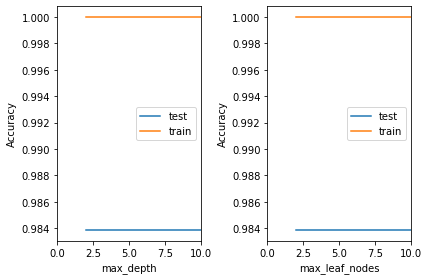

In [38]:
# To visualize the max. depth and max_leaf_nodes for both acc_train and acc_test :

# plotting for "max_depth" :

plt.subplot(1,2,1)  
plt.plot("max_depth","acc_test", data = max_depth , label = "test")
plt.plot("max_depth","acc_train", data = max_depth , label = "train")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.xlim([0,10])
plt.legend()


# plotting for "max_leaf_nodes" :

plt.subplot(1,2,2)  
plt.plot("max_leaf_nodes","acc_test", data = max_leaf_node , label = "test")
plt.plot("max_leaf_nodes","acc_train", data =max_leaf_node , label = "train")
plt.xlabel("max_leaf_nodes")
plt.ylabel("Accuracy")
plt.xlim([0,10])
plt.legend()


plt.tight_layout();

In [40]:
# Since the data is biased so we used "croos validation" to overcome the problem of class biasness.

# we have to import the cross_validation from sklearn.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt , x , y , cv =5)
scores

array([0.98230769, 0.97846154, 0.98460354, 0.97921478, 0.98075443])

In [41]:
# we always consider the mean of these scores as the final accuracy in case class biasness .

acc_dt_final = scores.mean()
acc_dt_final

0.9810683958074259

## RANDOM FOREST

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()   

In [31]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
# predcition :

pred_value= rf.predict(x_test)
pred_value

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [33]:
tab_rf = confusion_matrix(y_test, pred_value)
tab_rf

array([[985,   4],
       [  2, 309]], dtype=int64)

In [34]:
acc_rf = accuracy_score(y_test, pred_value)
acc_rf

0.9953846153846154

In [35]:
# Model Enhancement :

# to display the col. names

x_train.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH'],
      dtype='object')

In [36]:
rf.feature_importances_

array([0.04424935, 0.12935961, 0.01513132, 0.05174299, 0.29329642,
       0.05629375, 0.33232981, 0.05594906, 0.02164769])

In [37]:
# To interpret that which col. has the highest value for feature selection :

Feature_Importance = pd.DataFrame({"Feature_Names": x_train.columns , "Importance": rf.feature_importances_})
Feature_Importance

,Feature_Names,Importance
0,fixed_acidity,0.044249
1,volatile_acidity,0.129360
2,citric_acid,0.015131
3,residual_sugar,0.051743
4,chlorides,0.293296
5,free_sulfur_dioxide,0.056294
6,total_sulfur_dioxide,0.332330
7,density,0.055949
8,pH,0.021648


In [38]:
# To sort the features according to important 
Feature_Importance.sort_values("Importance" , ascending= False)

,Feature_Names,Importance
6,total_sulfur_dioxide,0.332330
4,chlorides,0.293296
1,volatile_acidity,0.129360
5,free_sulfur_dioxide,0.056294
7,density,0.055949
3,residual_sugar,0.051743
0,fixed_acidity,0.044249
8,pH,0.021648
2,citric_acid,0.015131


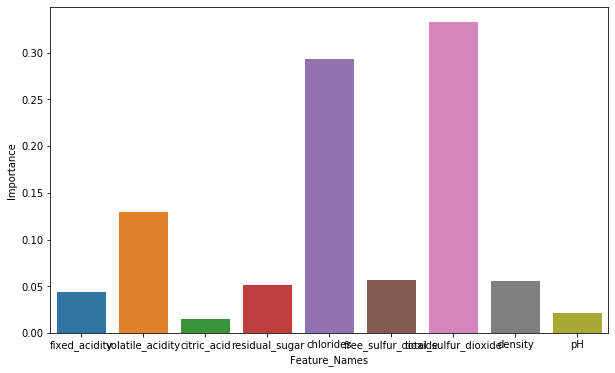

In [39]:
# Plotting feature importance values on the graph :

plt.figure(figsize=(10,6))
sb.barplot(x = Feature_Importance.Feature_Names , y = Feature_Importance.Importance);

In [40]:
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [41]:
# Revising the model based on the feature selection values :

x1 = wine.iloc[: , [1,4,5,6,7]]
y1 = wine.iloc[: , -1]

In [42]:
x1_train, x1_test , y1_train , y1_test = train_test_split(x1 , y1, test_size = 0.2, random_state=0)

In [43]:
# Building the new model:

rf1 = RandomForestClassifier()
rf1.fit(x1_train,y1_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
# Predictiiong the values from new model :

pred_value_new = rf1.predict(x1_test)
pred_value_new

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [45]:
# Building the confudion matrix and checking the accuracy :

tab_new = confusion_matrix(y1_test,pred_value_new)
tab_new

array([[979,  10],
       [  6, 305]], dtype=int64)

In [46]:
acc_new = accuracy_score(y1_test,pred_value_new)
acc_new

0.9876923076923076

In [48]:
# For Tree visualisation :

estimator = rf1.estimators_[0]

In [49]:
# For adding the path to the envt.

import os
os.environ['PATH'] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'

In [50]:
# Libararies imported for plooting of forest :

from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

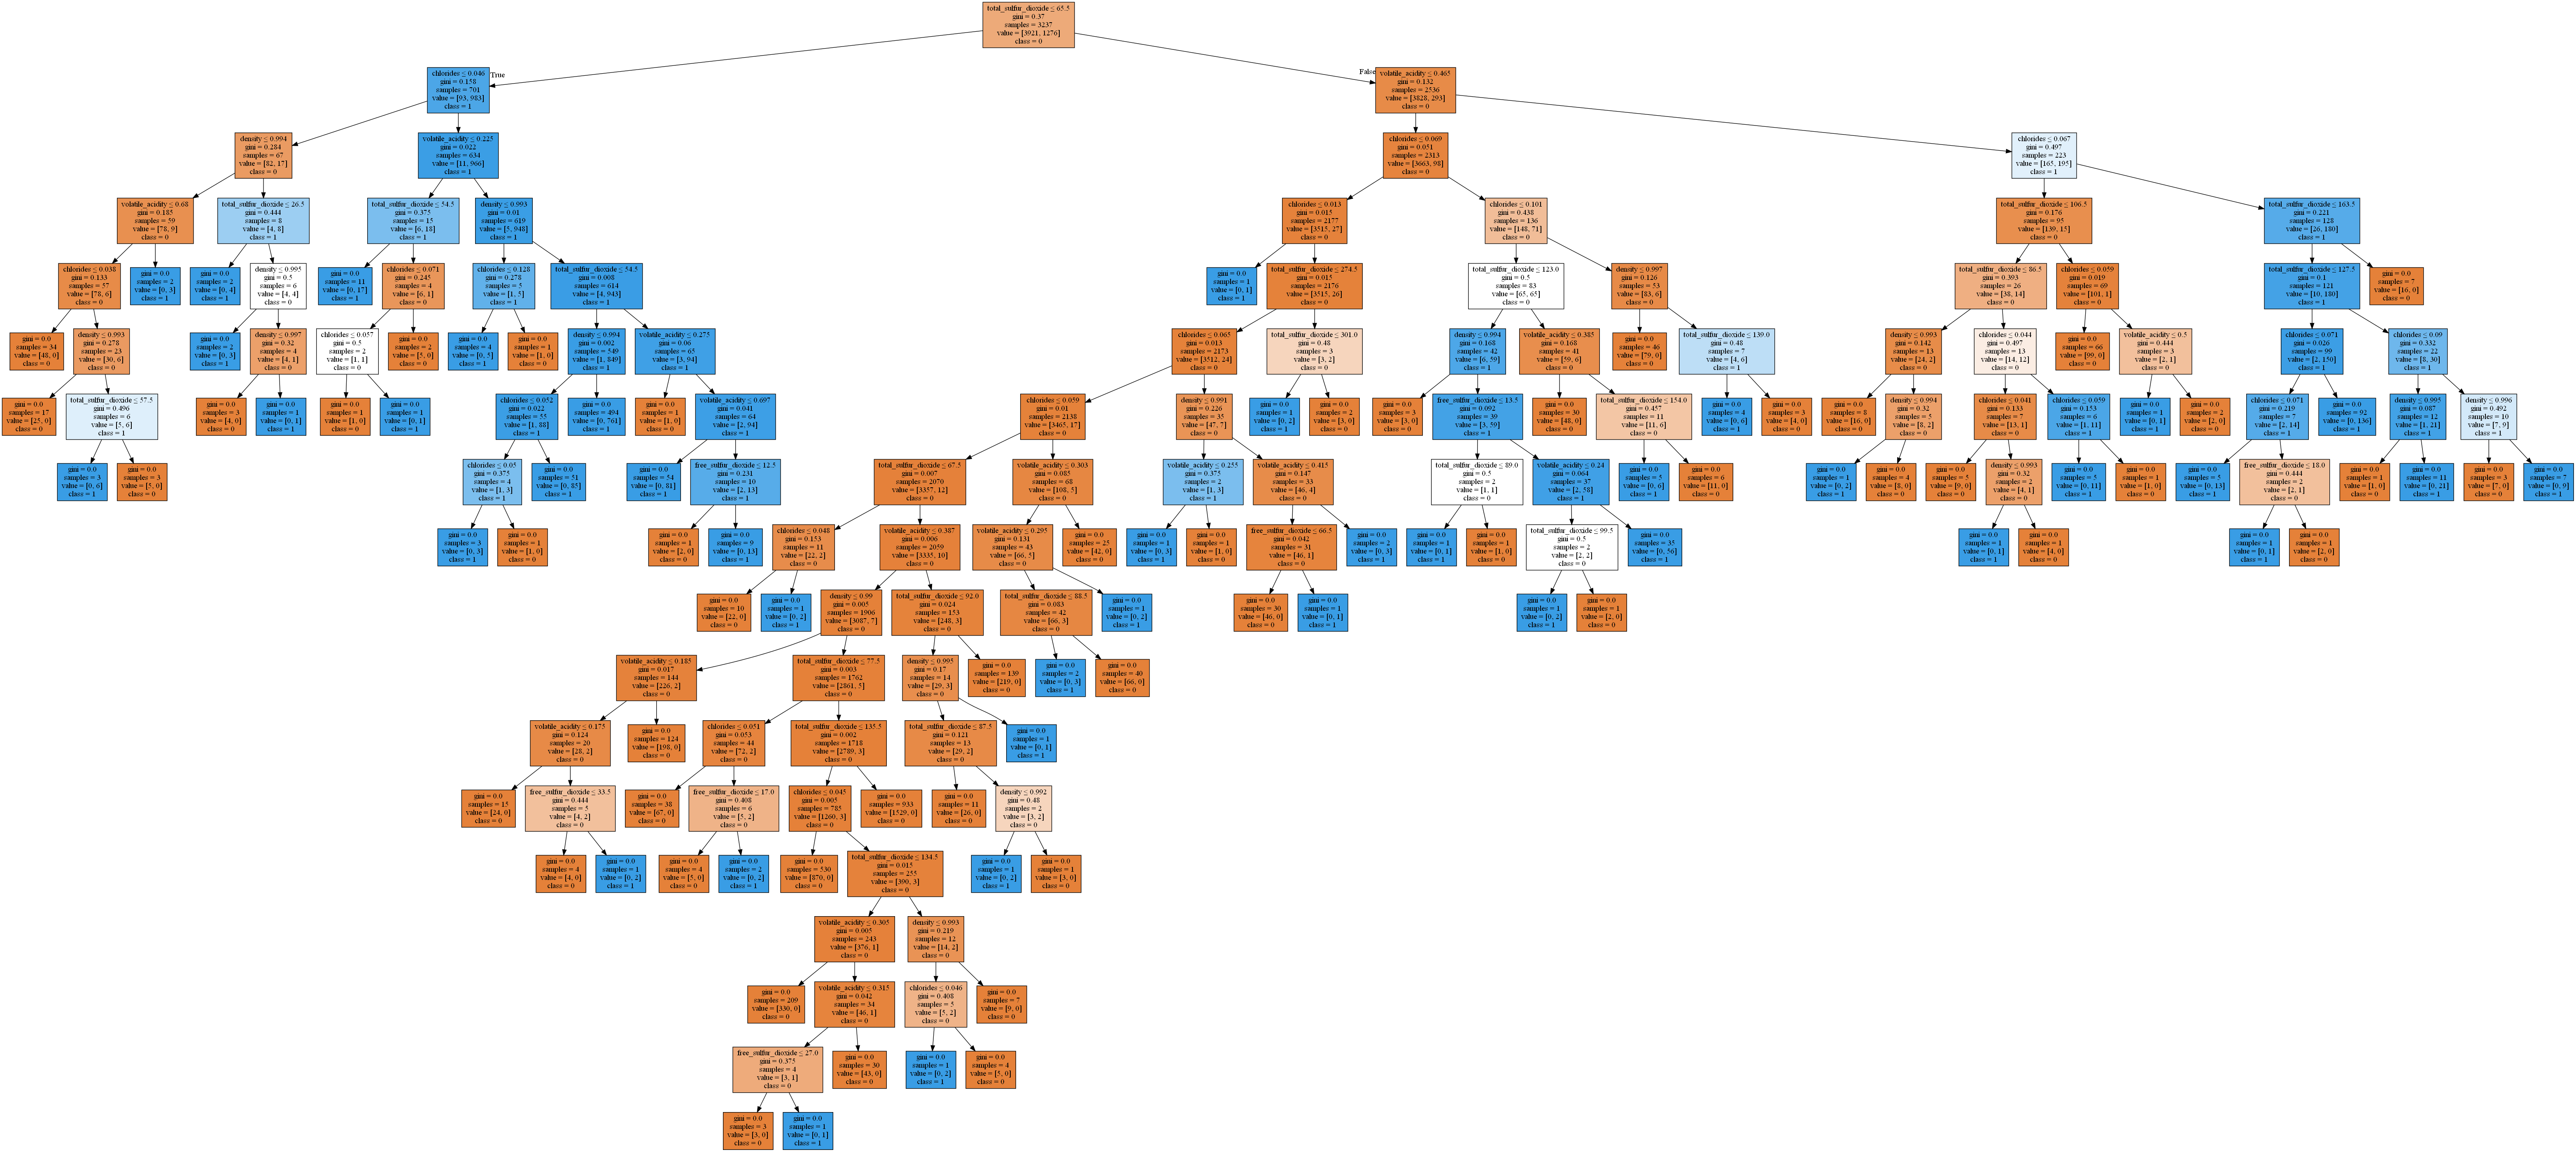

In [51]:
# To visulaize the tree :

dot_data=StringIO()
export_graphviz(estimator,out_file=dot_data,filled=True,special_characters=True,feature_names= x1_train.columns,
                class_names=['0','1'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine.png')
Image(graph.create_png())